# Práctica 1: Análisis exploratorio de datos, preprocesamiento y validación de modelos de clasificación

## Minería de Datos

### Curso académico 2021-2022

#### Profesorado:

* Juan Carlos Alfaro Jiménez
* José Antonio Gámez Martín

---
#### Alumnos:
* Raúl Milla
* Juan Ibañez
---

**Notas**:

* Adaptado de las prácticas de Jacinto Arias Martínez y Enrique González Rodrigo.

---

## 1.Preliminares 

Para empezar tendremos que crear la semilla e implementar las funciones que usaremos más adelante

In [36]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from IPython.display import display
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas_profiling import ProfileReport
import plotly.express as px
def fit_evaluate(estimator, X_train, X_test, y_train, y_test):
    """Fit the estimator to the training dataset and evaluate in the testing dataset."""
    # Fit the model according to the given training dataset
    estimator = estimator.fit(X_train, y_train)

    # Predict the class labels for the testing dataset
    predictions = estimator.predict(X_test)

    # Build a text report (in a dictionary) with the main classification metrics
    report = classification_report(y_test, predictions, output_dict=True)

    # Convert the dictionary to tabular data
    report = pd.DataFrame(report).T

    # Display the text report
    display(report)

    # Plot the confusion matrix for the testing dataset
    plot_confusion_matrix(estimator, X_test, y_test);

    return estimator, predictions
def cambiarANum(data,columna,lista,lista2):#convierte de lista a lista2
    for i in range(len(lista)):
        data[columna].iloc[data[columna]==lista[i]]=int(lista2[i])
    return data
random_state = 27912

## 2.Acceso y almacenamiento de datos

A continuacion importaremos los datos de titanic en nuestra libreta,para ello importaremos los datos del `train` ya que era un torneo de kagle.Utilizaremos como columna id la columna `PassengerId`.

In [3]:
data = pd.read_csv("../input/titanic/train.csv",index_col="PassengerId")

La variable clase sera el atributo `Survived` y le ponemos que sea tipo `category`

In [4]:
target = "Survived"

In [5]:
data[target] = data[target].astype("category")

Hacemos una comprobacion del conjunto

In [9]:
data.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S
695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


A continuacion separamos la variable clase de las demas

In [10]:
X=data.drop(target,axis=1)
y= data[target]

Comprobamos que efectivamente se ha hecho la separacion de manera correcta

In [11]:
X.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
209,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
747,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
606,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
327,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
615,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S


In [12]:
y.sample(5)

PassengerId
178    0
413    1
757    0
354    0
474    1
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

A continuacion creamos dos subconjuntos siendo uno de un 70% del subconjunto total y otro un 30 % ya que el primero es el train y el segundo es el test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=random_state, train_size=0.7)

In [14]:
X_train.sample(5, random_state=random_state)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
687,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
685,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S
885,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
609,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [15]:
X_test.sample(5, random_state=random_state)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
352,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
429,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
644,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
202,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [16]:
y_train.sample(5, random_state=random_state)

PassengerId
687    0
786    0
685    0
885    0
609    1
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [17]:
y_test.sample(5, random_state=random_state)

PassengerId
352    0
429    0
264    0
644    1
202    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [18]:
data_train = X_train.join(y_train)

In [19]:
data_test = X_test.join(y_test)

In [20]:
data_train.sample(5, random_state=random_state)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
687,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,0
786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,0
685,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S,0
885,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
609,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,1


In [21]:
data_test.sample(5, random_state=random_state)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
352,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,0
429,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q,0
264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,0
644,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,1
202,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0


## 3.Analisis de datos

A continuacion empezaremos a analizar los datos del `train`.Primero conoceremos el numero de casos y variables.

In [22]:
data_train.shape

(623, 11)

Vemos que tenemos 623 casos y 11 atributos.
A continuacion veremos la cantidad de `null` tiene cada atributo

In [24]:
X_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 66 to 593
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Name      623 non-null    object 
 2   Sex       623 non-null    object 
 3   Age       503 non-null    float64
 4   SibSp     623 non-null    int64  
 5   Parch     623 non-null    int64  
 6   Ticket    623 non-null    object 
 7   Fare      623 non-null    float64
 8   Cabin     142 non-null    object 
 9   Embarked  621 non-null    object 
dtypes: float64(2), int64(3), object(5)

Vemos que hay varios atributos con valores nulos ,que son `Age` que tiene 120 nulos, `Cabin` que tiene 481 valores nulos y `Embarked` tiene un valor nulo.
Por lo que en `Cabin` tiene un 77% de datos nulos,`Age` tiene un 19.26% de datos nulos.
Tambien vemos que hay datos no numericos como por ejemplo `Name` , `Sex`, `Ticket`,`Cabin` y `Embarked` por lo que tratan de ` variables discretas` por lo que habra que transformarlo en `variable continua`.
Ahora tendremos que ver como transformar estos datos.
En el caso de `name` no podemos hacer nada.
En el caso de `sex` tenemos dos tipos de datos `male` y `female` por lo que tendremos que transformarlo en 1 y 0.
En el caso de `Ticket` no podemos ya que son valores unicos para todos.
En el caso de `Cabin` es igual que antes y ademas esta variable tiene muchos valores perdidos.
En el caso de `Embarked` tenemos tres tipos de datos C,Q y S por lo que tendremos que  cambiar a 0,1 y 2 

Veamos si la muestra es valanceada o no 

In [34]:
px.histogram(y_train, histnorm="probability")

Vemos que un 60% es 0 y 40% es 1 por lo que podriamos decir que más o menos es una `muestra valanceada`

Ahora realizaremos una copia del train para poder analizarlo 

In [38]:
copia= X_train.copy()

Ahora tenddremos que hacer las transformaciones para que se conviertan en variables continuas para poder analizarlas 

In [41]:
cambiarANum(copia,"Sex",['male','female'],[0,1])
cambiarANum(copia,"Embarked,['S','Q,']")
copia.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
228,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,NaN,S
156,1,"Williams, Mr. Charles Duane",0,51.0,0,1,PC 17597,61.3792,NaN,C
342,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,C23 C25 C27,S
448,1,"Seward, Mr. Frederic Kimber",0,34.0,0,0,113794,26.5500,NaN,S
248,2,"Hamalainen, Mrs. William (Anna)",1,24.0,0,2,250649,14.5000,NaN,S


In [26]:
profile_report = ProfileReport(data_train)
profile_report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Segun esta informacion tenemos varias correlaciones por lo que tenemos que revisarlo, pero antes 

<AxesSubplot:>

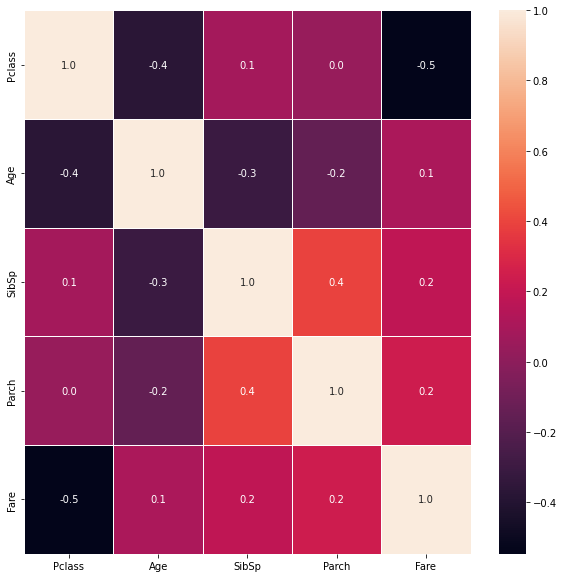

In [30]:
import seaborn as sns
from matplotlib import pyplot as mpl

f,ax=mpl.subplots(figsize=(10,10))
corrMatrix = data_train.corr()

sns.heatmap(corrMatrix,annot=True,linewidths=.5,fmt=".1f",ax=ax)

Vemos que la maxima correlacion es de 0.5

TypeError: unsupported operand type(s) for /: 'str' and 'int'

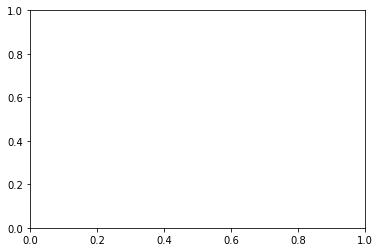

In [33]:
import matplotlib.pyplot as plt
aux=X_train
plt.boxplot(X_train)